In [1]:
# project: p6
# submitter: kickbush
# partner: none
# hours: 10

In [2]:
#q1
import geopandas
df = geopandas.read_file('counties.geojson')
len(df)

72

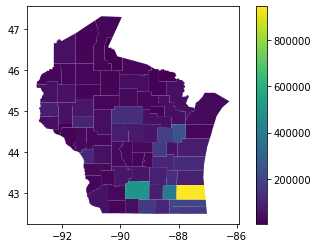

In [3]:
#q2
wiscCounty = df.plot(column='POP100', legend=True)

In [4]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
connection = sqlite3.connect("counties_tracts.db")
pd.read_sql("""SELECT * FROM sqlite_master""", connection)

,type,name,tbl_name,rootpage,sql
0,table,counties,counties,2,"CREATE TABLE ""counties"" (\n""index"" INTEGER,\n ..."
1,index,ix_counties_index,counties,3,"CREATE INDEX ""ix_counties_index""ON ""counties"" ..."
2,table,tracts,tracts,4,"CREATE TABLE ""tracts"" (\n""index"" INTEGER,\n ""..."
3,index,ix_tracts_index,tracts,5,"CREATE INDEX ""ix_tracts_index""ON ""tracts"" (""in..."


In [5]:
areaLand = pd.read_sql("""SELECT * FROM counties""", connection) #Grabas areaLand df from spl
areaList = areaLand['AREALAND'].tolist() #Makes area into a list
df['AREALAND'] = areaList #Adds AREALAND column to dataFrame
df

,NAME,POP100,geometry,AREALAND
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338...",2054044751
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413
...,...,...,...,...
67,Washburn County,15911,"POLYGON ((-91.55065 46.07034, -91.55065 46.070...",2064515991
68,Monroe County,44673,"POLYGON ((-90.55246 43.72565, -90.55096 43.725...",2333270295
69,Richland County,18021,"POLYGON ((-90.31107 43.55399, -90.31108 43.553...",1518120276
70,Price County,14159,"POLYGON ((-90.04485 45.81765, -90.04440 45.830...",3248866440


In [6]:
#q3
x_train, x_test, y_train, y_test = train_test_split(df['NAME'],df['POP100'], random_state=320, test_size=.25)
x_test.tolist()

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [7]:
#q4
train, test = train_test_split(df, random_state=320, test_size=.25)

lr = LinearRegression()
model  = lr.fit(train[['AREALAND']], train['POP100'])
lr.score(test[['AREALAND']], test['POP100'])

0.022002661530554857

In [28]:
#q5
num = 1e6 * 500 * 2.59
predict_df = pd.DataFrame({"AREALAND": [num]})
predict_df["predicted_pop"] = lr.predict(predict_df)
print(predict_df)
float(predict_df["predicted_pop"])

       AREALAND  predicted_pop
0  1.295000e+09   3.089903e+09


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AREALAND
Feature names seen at fit time, yet now missing:
- HU100

  warnings.warn(message, FutureWarning)


3089902986.0551896

In [9]:
connection = sqlite3.connect("counties_tracts.db")
pd.read_sql("""SELECT * FROM sqlite_master""", connection)
tractsDb = pd.read_sql("""SELECT * FROM tracts""", connection)
countieDb = pd.read_sql("""SELECT * FROM counties""", connection)



In [10]:
#q6
tractsDb

#Creates a dictionary with all HU100 values with countyCode as the key
temp = tractsDb.groupby('COUNTY')['HU100'].apply(list).to_dict() #Createes a dictionary that corresponds to (countyNumer:Hu100 values -->These values are in a list format we will sum this list in the for loop)
countyName = dict(zip(countieDb.COUNTY, countieDb.NAME)) #Creates a dictionary that contains {countyCode:CountyName}
countyHuDict = dict() #Dictionary that will be used for dataFrame
for i in temp.keys(): #Creates a dictionary with {countyName:Hu100} sum
    temp[i] = sum(temp[i]) #Sums the values of the temp dict EX: {001: 130, 140, 10} ----? {001: sum of (130, 140, 10)}
    county = countyName[i] #Gets county name from county dictionary correlating to the county code number {001: Jefferson} EX: county = Jefferson
    countyHuDict[county] = temp[i] #Inserts a key value pair into the final dictionary  {CountyName: Summed value of the list}
df['HU100'] = df['NAME'].map(countyHuDict) #Adds HU100 to df mapped by dictionary
train, test = train_test_split(df, random_state=320, test_size=.25)
testSet = test['NAME'].tolist()
testSet
#lr = LinearRegression()
#lr.fit(train[['NAME']], train['HU100'])
#lr.score(test[['NAME']], test['HU100'])

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [11]:
#q7
testCounty = dict()
for i in train['NAME']:
    testCounty[i] = countyHuDict[i]
testCounty

{'Walworth County': 51531,
 'Marquette County': 9896,
 'Racine County': 82164,
 'Waupaca County': 25396,
 'Lincoln County': 16784,
 'Washburn County': 12979,
 'Door County': 23966,
 'Waukesha County': 160864,
 'Sheboygan County': 50766,
 'La Crosse County': 48402,
 'Langlade County': 12360,
 'Marathon County': 57734,
 'Jefferson County': 35147,
 'Price County': 11120,
 'Vilas County': 25116,
 'Columbia County': 26137,
 'Ozaukee County': 36267,
 'Fond du Lac County': 43910,
 'Crawford County': 8802,
 'Lafayette County': 7230,
 'Green County': 15856,
 'Marinette County': 30379,
 'Vernon County': 13720,
 'Douglas County': 22825,
 'Rock County': 68422,
 'Iowa County': 10719,
 'Dane County': 216022,
 'Bayfield County': 12999,
 'Polk County': 24248,
 'Trempealeau County': 12619,
 'Brown County': 104371,
 'Washington County': 54695,
 'Chippewa County': 27185,
 'Oconto County': 23537,
 'Richland County': 8868,
 'Portage County': 30054,
 'Sawyer County': 15975,
 'Menominee County': 2253,
 'Barr

In [12]:
#q8
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
x = train[['HU100']] #Data
y = train['POP100']  #Target Data
scores = cross_val_score(model,x,y,cv=5)
scores.mean()

0.9652534544116037

In [13]:
#q9
scores.std()

0.03704265206670459

<AxesSubplot:xlabel='HU100', ylabel='POP100'>

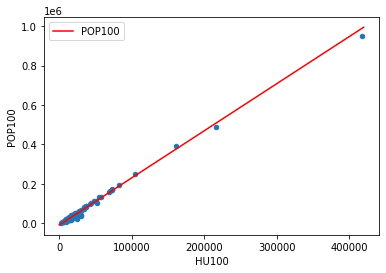

In [14]:
#q11
#model.predict(df[["HU100"]])
lr = LinearRegression()
model  = lr.fit(train[['HU100']], train['POP100'])
predict_df = pd.DataFrame({"HU100": range(1, 420000)})

predict_df["POP100"] = model.predict(predict_df)
plotPredict = predict_df.plot.line(x="HU100", y="POP100", color='red')
df.plot.scatter('HU100', 'POP100', legend=True, ax=plotPredict)

In [15]:
#q10
model.intercept_
stringThing = '*HU100 + '
#model.coef_ = 2.386...
#mode.intercept_ = 
POP100 = 'POP100 = ' + str(round(float(model.coef_), 2)) + stringThing + str(round(float(model.intercept_), 2))
POP100

'POP100 = 2.39*HU100 + -7910.46'

In [16]:
model.coef_

array([2.38603158])

In [17]:
#q12
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])
12


12

In [18]:
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

In [19]:
df

,NAME,POP100,geometry,AREALAND,HU100
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739,82164
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070,15076
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338...",2054044751,34088
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584,8883
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413,36267
...,...,...,...,...,...
67,Washburn County,15911,"POLYGON ((-91.55065 46.07034, -91.55065 46.070...",2064515991,12979
68,Monroe County,44673,"POLYGON ((-90.55246 43.72565, -90.55096 43.725...",2333270295,19204
69,Richland County,18021,"POLYGON ((-90.31107 43.55399, -90.31108 43.553...",1518120276,8868
70,Price County,14159,"POLYGON ((-90.04485 45.81765, -90.04440 45.830...",3248866440,11120


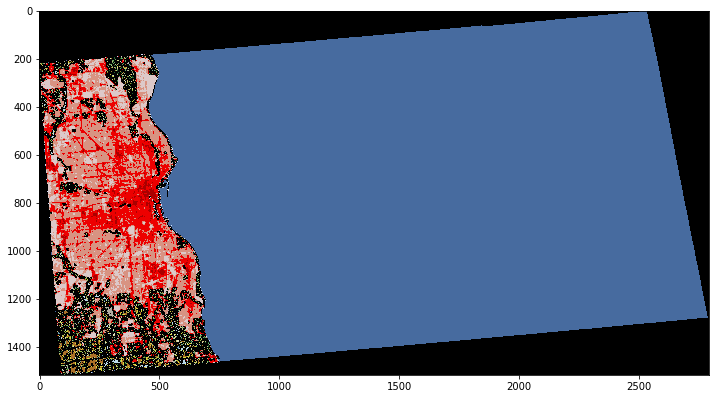

In [20]:
#q13
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt
import geopandas as gpd

land = rasterio.open("zip://../p6/land.zip!wi.tif")
window = df[df["NAME"]=="Milwaukee County"]["geometry"].set_crs("epsg:4326").to_crs(land.crs)
fig, ax = plt.subplots(figsize=(12,12))
matrix = mask(land, window, crop=True)[0][0]
ax.imshow(matrix, vmin=0, vmax=255, cmap=custom_cmap)

In [21]:

land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

In [22]:
#q14
np.count_nonzero(matrix==11)/np.count_nonzero(matrix)


0.7963037455950543

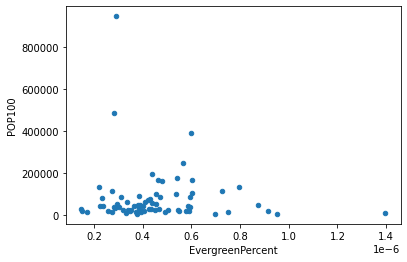

In [23]:
#q15
matrixDict = dict()
for i in df['NAME'].tolist():
    window = df[df["NAME"]==i]["geometry"].set_crs("epsg:4326").to_crs(land.crs)
    matrix = mask(land, window, crop=True)[0][0]
    percentageOfEvergreen = np.count_nonzero(land_use['evergreen'])/np.count_nonzero(matrix)
    matrixDict[i] = percentageOfEvergreen
df['EvergreenPercent'] = df['NAME'].map(matrixDict)
ax = df.plot.scatter(x='EvergreenPercent', y='POP100')
#I chose evergreen for my land

In [24]:

#Grabs tractsDf will add two columns corresponding to different types of land
df = geopandas.read_file('tracts.geojson')
matrixDict1 = dict()
matrixDict2 = dict()
matrixDict3 = dict()
for i in df['GEOID'].tolist():
    window = df[df["GEOID"]==i]["geometry"].set_crs("epsg:4326").to_crs(land.crs)
    matrix = mask(land, window, crop=True)[0][0]
    percentageOfHigh = np.count_nonzero(land_use['developed_high'])/np.count_nonzero(matrix)
    percentageOfLow = np.count_nonzero(land_use['developed_low'])/np.count_nonzero(matrix)
    percentageOfMed = np.count_nonzero(land_use['developed_med'])/np.count_nonzero(matrix)
    matrixDict1[i] = percentageOfHigh*100
    matrixDict2[i] = percentageOfLow*100
    matrixDict3[i] = percentageOfMed*100
    
    
df['HighDevelop'] = df['GEOID'].map(matrixDict1) #Percentage of High Developement within tract
df['LowDevelop'] = df['GEOID'].map(matrixDict2)  #Percentage of Low developement within tract
df['MedDevelop'] = df['GEOID'].map(matrixDict3) #Percentage of Medium Developement within tract


[-0.18645577  0.06549791  0.10081057  0.11641794  0.03839589]
0.11010800610512375
0.02286776768187366


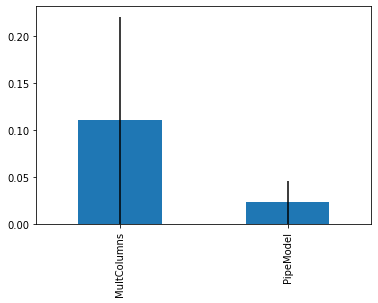

In [25]:
#q16
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
train, test = train_test_split(df, random_state=320)
#Originally I attempted to model, evergreen vs. Population and cropland vs. Population. This produced poor results due to their not being 
#great correlation between the two.
#Model 1 standard regression
model = LinearRegression()
model.fit(train[['HighDevelop']], train['POP100'])
scores1 = cross_val_score(model, test[['HighDevelop']], test['POP100'])
scores1

pf = PolynomialFeatures(include_bias=False, degree=3)
oh = OneHotEncoder()
#data = pf.fit_transform(train[['HighDevelop', 'POP100']])

pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr', LinearRegression())
])
pipe.fit(train[['MedDevelop']], train['POP100'])
score = pipe.score(test[['MedDevelop']], test['POP100'])
scores2 = cross_val_score(pipe, train[['MedDevelop']], train['POP100'])

std = pd.Series({'MultColumns': scores1.std(), "PipeModel": scores2.std()})
ax = std.plot.bar(yerr=std)

print(scores1)
print(scores1.std())
print(scores2.std())

In [26]:
df

,GEOID,POP100,geometry,HighDevelop,LowDevelop,MedDevelop
0,55001950204,1646,"POLYGON ((-90.02638 44.08721, -90.02628 44.086...",0.000223,0.000223,0.000223
1,55009940002,4698,"POLYGON ((-88.15018 44.51202, -88.15011 44.509...",0.007808,0.007808,0.007808
2,55061990000,0,"POLYGON ((-87.53727 44.33179, -87.53920 44.327...",0.000047,0.000047,0.000047
3,55009020100,5817,"POLYGON ((-87.93753 44.67821, -87.93742 44.630...",0.000333,0.000333,0.000333
4,55009010100,6506,"POLYGON ((-88.06825 44.45368, -88.06830 44.453...",0.017036,0.017036,0.017036
...,...,...,...,...,...,...
1537,55139003100,2046,"POLYGON ((-88.47454 44.19198, -88.47453 44.191...",0.022041,0.022041,0.022041
1538,55079017900,2879,"POLYGON ((-87.91064 42.99520, -87.91063 42.995...",0.146628,0.146628,0.146628
1539,55059000800,2763,"POLYGON ((-87.84574 42.60276, -87.84574 42.602...",0.069444,0.069444,0.069444
1540,55025013700,7107,"POLYGON ((-89.57788 42.98135, -89.57789 42.980...",0.004663,0.004663,0.004663


In [27]:
#q17
#I used the second model due to the much better score. My second model using a pipe containing a polynomial and linear regression model. My second model has much less variance compared to the first model as well.
score

0.11356257854878116